In [234]:
import json
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import array

In [235]:
%matplotlib inline

In [236]:
tweet_files = [r'C:\Users\Shrekar\Documents\PYTHON\twitter_search-master\Trump\trumpdate.json']
tweets = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweets.append(json.loads(line))

In [237]:
df = pd.DataFrame(tweets)

In [238]:
df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'urls': [], 'hashtags': [], 'symbols': [], 'u...",NaN,0,False,None,853035136379736064,853035136379736064,...,NaN,NaN,NaN,6458,False,"{'favorite_count': 15164, 'in_reply_to_user_id...","<a href=""http://twitter.com/download/iphone"" r...",RT @SenSanders: A lot of working people voted ...,False,"{'follow_request_sent': False, 'profile_sideba..."
1,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'urls': [], 'hashtags': [{'text': 'trumprussi...",NaN,0,False,None,853035136060977152,853035136060977152,...,NaN,NaN,NaN,331,False,"{'favorite_count': 290, 'in_reply_to_user_id':...","<a href=""http://twitter.com/download/iphone"" r...",RT @funder: Report says Trump Adviser JD Gordo...,False,"{'follow_request_sent': False, 'profile_sideba..."
2,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'urls': [], 'hashtags': [], 'symbols': [], 'u...",NaN,0,False,None,853035135926665216,853035135926665216,...,NaN,NaN,NaN,2113,False,"{'favorite_count': 2573, 'in_reply_to_user_id'...","<a href=""http://twitter.com/download/iphone"" r...",RT @RVAwonk: Trump won't let you view the WH v...,False,"{'follow_request_sent': False, 'profile_sideba..."
3,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'urls': [], 'hashtags': [], 'symbols': [], 'u...",NaN,0,False,None,853035135918383104,853035135918383104,...,NaN,NaN,NaN,5868,False,"{'favorite_count': 11977, 'in_reply_to_user_id...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @tedlieu: Dear @POTUS: Here's a tip. Get a ...,False,"{'follow_request_sent': False, 'profile_sideba..."
4,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'urls': [{'url': 'https://t.co/8zhA2iHyqE', '...",NaN,0,False,None,853035135565840384,853035135565840384,...,NaN,3.737435e+17,373743492151136256,4,False,"{'favorite_count': 4, 'in_reply_to_user_id': N...","<a href=""http://twitter.com/download/iphone"" r...",RT @Uslopp: Retweeting again so you Trump-hump...,False,"{'follow_request_sent': False, 'profile_sideba..."
5,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'urls': [], 'hashtags': [], 'symbols': [], 'u...",NaN,0,False,None,853035135532503040,853035135532503040,...,NaN,NaN,NaN,13517,False,"{'favorite_count': 18505, 'in_reply_to_user_id...","<a href=""http://twitter.com/download/iphone"" r...",RT @DannyZuker: BREAKING: Trump drops entire b...,False,"{'follow_request_sent': False, 'profile_sideba..."
6,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'urls': [{'url': 'https://t.co/Rchyc3aO3H', '...",NaN,0,False,None,853035135146524672,853035135146524672,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",Democrats In Illinois Just Unseated A Whole Bu...,False,"{'follow_request_sent': False, 'profile_sideba..."
7,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'urls': [], 'hashtags': [], 'symbols': [], 'u...",NaN,0,False,None,853035135138230272,853035135138230272,...,NaN,NaN,NaN,146,False,"{'favorite_count': 330, 'in_reply_to_user_id':...","<a href=""http://twitter.com/#!/download/ipad"" ...","RT @KwikWarren: Hi FBI, could y'all please ind...",False,"{'follow_request_sent': False, 'profile_sideba..."
8,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'urls': [], 'hashtags': [], 'symbols': [], 'u...",NaN,0,False,None,853035135029174272,853035135029174272,...,NaN,8.229914e+17,822991354888212480,114,False,"{'favorite_count': 137, 'in_reply_to_user_id':...","<a href=""http://twitter.com/download/iphone"" r...",RT @Khanoisseur: @GStephanopoulos 4. Overlooke...,False,"{'follow_request_sent': False, 'profile_sideba..."
9,None,None,Fri Apr 14 23:59:59 +0000 2017,"{'urls': [], 'hashtags': [], 'symbols': [], 'u...",NaN,0,False,None,853035134894866432,853035134894866432,...,NaN,NaN,NaN,6,False,"{'favorite_count': 12, 'in_reply_to_user_id': ...","<a href=""http://twitter.com"" 

In [239]:
df['text']

0       RT @SenSanders: A lot of working people voted ...
1       RT @funder: Report says Trump Adviser JD Gordo...
2       RT @RVAwonk: Trump won't let you view the WH v...
3       RT @tedlieu: Dear @POTUS: Here's a tip. Get a ...
4       RT @Uslopp: Retweeting again so you Trump-hump...
5       RT @DannyZuker: BREAKING: Trump drops entire b...
6       Democrats In Illinois Just Unseated A Whole Bu...
7       RT @KwikWarren: Hi FBI, could y'all please ind...
8       RT @Khanoisseur: @GStephanopoulos 4. Overlooke...
9       RT @Poelstoot18: Trump vaagt N.Korea binnenkor...
10      RT @TheLastWord: Joe Biden condemns LGBTQ cris...
11      Trump delights in watching the U.S. military d...
12      RT @KentuckyBlacc: Every General wanted JFK to...
13      RT @AP: Pentagon officials say US commander in...
14      RT @molly_knight: If the people investigating ...
15      RT @GhostPanther: Just want to give an extra s...
16      RT @MAMABEAR1219: Source: foreign intel gives ...
17      RT @Ra

In [240]:
tweet=df['text']

In [241]:
blob = TextBlob(tweet[1])
blob.sentiment

Sentiment(polarity=-0.4, subjectivity=0.7)

In [243]:
polar = pd.DataFrame()
n = int(len(tweet)) 
sen = []
for i in range(n):
    blob = TextBlob(tweet[i])
    k = blob.sentiment.polarity
    sen.append(k)


In [244]:
polar['polarity'] = sen
polar

,polarity
0,0.000000
1,-0.400000
2,0.000000
3,-0.125000
4,0.000000
5,0.000000
6,0.200000
7,-0.600000
8,0.000000
9,1.000000


In [245]:
senf_tran = senf.transpose

sennew = senf_tran
sennew

<bound method DataFrame.transpose of      0
0  0.0>

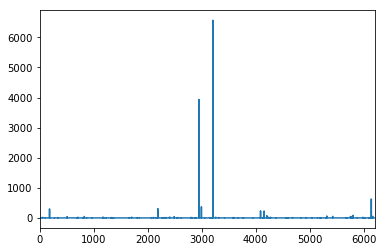

In [246]:
df['favorite_count'].plot()

In [247]:
import time
import pylab as pl

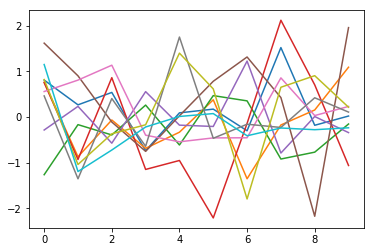

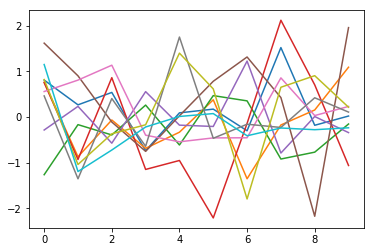

In [248]:

from IPython import display
for i in range(10):
    pl.plot(pl.randn(10))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

In [249]:

from IPython import display
for i in range(10):
    pl.plot(pl.polar.loc['polarity'])
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

AttributeError: 'function' object has no attribute 'loc'

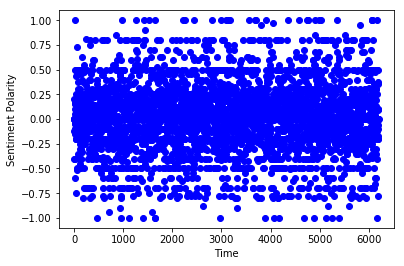

In [250]:
#plt.axis([ 0, 100, -5,5])
plt.xlabel('Time')
plt.ylabel('Sentiment Polarity')
plt.plot(polar,'bo')
plt.show()
plt.pause(1)

In [252]:
retweet = df['retweet_count']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCC7A6B860>]], dtype=object)

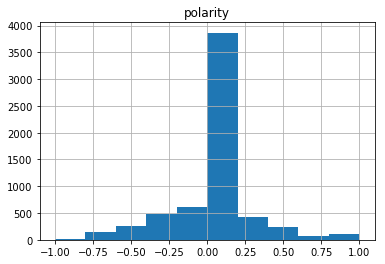

In [253]:
polar.hist()

In [ ]:
polar.plot.bar()

In [ ]:
polar.plot.line(x=polar.index,y='polarity',figsize=(12,3),lw=1)

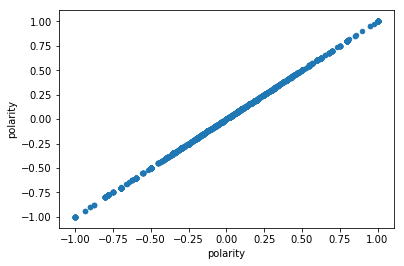

In [256]:
polar.plot.scatter(x='polarity',y='polarity')

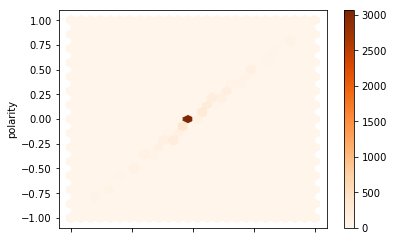

In [258]:
polar.plot.hexbin(x='polarity',y='polarity',gridsize=25,cmap='Oranges')